In [2]:
import os, shutil
import PIL

original_dataset_dir = 'C:/Users/Hydro/Downloads/dogs-vs-cats/train'

base_dir = 'C:/Users/Hydro/Downloads/dogs-vs-cats-small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [7]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [8]:
#original cats to train cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#original cats to validation cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#original cats to test cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
#original dogs to train dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#original dogs to validation dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#original dogs to test dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print("\n")
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total validation cat images:  500
total test cat images:  500


total training dog images:  1000
total validation dog images:  500
total test dog images:  500


In [48]:
%config IPCompleter.greedy=True

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
for data_batch, labels_batch in validation_generator:
    print(data_batch.shape, labels_batch.shape)
    break

(20, 150, 150, 3) (20,)


In [49]:
# fit model with generators, so we use fit generator, which in turn uses validation generator function.
#Both are generators so will loop endlessly, so we use the steps flag for both generators

history = model.fit_generator(train_generator,
                           steps_per_epoch = 100,
                           epochs = 30,
                           validation_data = validation_generator,
                           validation_steps = 50)


save_dir = r'C:\Users\hydro\Documents\GitHub\deep-learning\dogs vs cats'
model.save('{}\cats_and_dogs_small_1.h5'.format(save_dir))

Epoch 1/30
100/100 [==============================] - 47s 475ms/step - loss: 0.6883 - acc: 0.5520 - val_loss: 0.6851 - val_acc: 0.5400
Epoch 2/30
100/100 [==============================] - 51s 505ms/step - loss: 0.6543 - acc: 0.6180 - val_loss: 0.6374 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 51s 507ms/step - loss: 0.6136 - acc: 0.6665 - val_loss: 0.6376 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 51s 511ms/step - loss: 0.5706 - acc: 0.7050 - val_loss: 0.6896 - val_acc: 0.6130
Epoch 5/30
100/100 [==============================] - 51s 509ms/step - loss: 0.5310 - acc: 0.7390 - val_loss: 0.5786 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 51s 514ms/step - loss: 0.5035 - acc: 0.7645 - val_loss: 0.7265 - val_acc: 0.6010
Epoch 7/30
100/100 [==============================] - 120s 1s/step - loss: 0.4872 - acc: 0.7650 - val_loss: 0.5629 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 51s

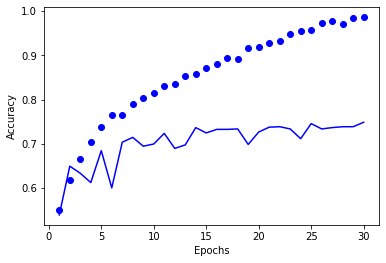

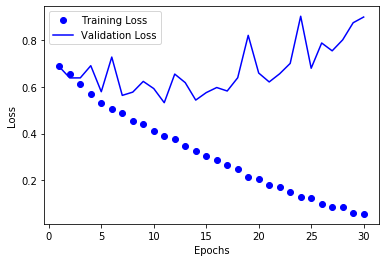

In [57]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

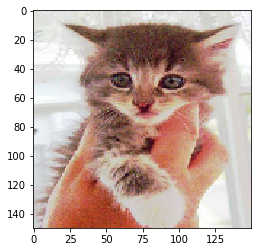

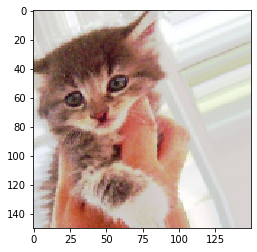

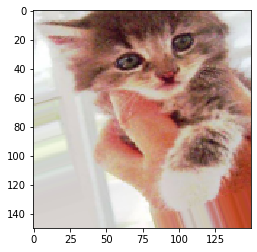

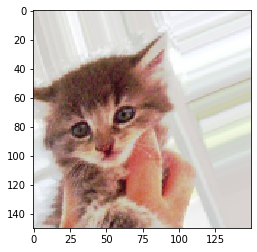

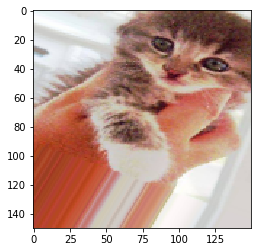

In [20]:
#data augmentation step - remixing images - sample check

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

#original image
plt.imshow(image.array_to_img(x))
plt.show()

x = x.reshape((1,) + x.shape)

#changed 4 images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 ==0:
        break

plt.show()

In [25]:
#data augmentation step - remixing images - full run on small test data

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150, 150),
                batch_size = 32,
                class_mode='binary')

test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(150, 150),
                batch_size = 32,
                class_mode='binary')

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 3))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 3))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs = 100,
                              validation_data = test_generator,
                              validation_steps = 50)

save_dir = r'C:\Users\hydro\Documents\GitHub\deep-learning\dogs vs cats'
model.save('{}\cats_and_dogs_small_2.h5'.format(save_dir))

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 62s 618ms/step - loss: 7.8572 - acc: 0.5066 - val_loss: 0.7063 - val_acc: 0.4937
Epoch 2/100
100/100 [==============================] - 63s 628ms/step - loss: 8.0608 - acc: 0.4944 - val_loss: 0.7044 - val_acc: 0.5006
Epoch 3/100
100/100 [==============================] - 61s 615ms/step - loss: 8.0260 - acc: 0.4966 - val_loss: 0.7030 - val_acc: 0.5051
Epoch 4/100
100/100 [==============================] - 61s 609ms/step - loss: 7.9511 - acc: 0.5013 - val_loss: 0.7032 - val_acc: 0.5032
Epoch 5/100
100/100 [==============================] - 66s 659ms/step - loss: 5.2497 - acc: 0.5081 - val_loss: 0.6930 - val_acc: 0.5146
Epoch 6/100
100/100 [==============================] - 65s 649ms/step - loss: 0.7661 - acc: 0.5394 - val_loss: 0.6927 - val_acc: 0.5019
Epoch 7/100
100/100 [==============================] - 69s 687ms/step - loss: 0.7034 - acc: 0.5660 -

KeyboardInterrupt: 